In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_excel('Data_InCarMusic.xlsx')

In [4]:
# Number of unique users
len(df['UserID'].unique())

42

In [5]:
# Number of unique items/songs
len(df['ItemID'].unique())

139

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4012 entries, 0 to 4011
Data columns (total 11 columns):
UserID               4012 non-null int64
ItemID               4012 non-null int64
 Rating              4012 non-null int64
DrivingStyle         353 non-null object
landscape            505 non-null object
mood                 406 non-null object
naturalphenomena     396 non-null object
RoadType             396 non-null object
sleepiness           157 non-null object
trafficConditions    399 non-null object
weather              397 non-null object
dtypes: int64(3), object(8)
memory usage: 344.9+ KB


In [7]:
df.describe()

,UserID,ItemID,Rating
count,4012.000000,4012.000000,4012.000000
mean,1019.090728,555.172483,2.377617
std,10.916548,216.942497,1.480944
min,1001.000000,248.000000,0.000000
25%,1009.000000,280.000000,1.000000
50%,1019.000000,692.000000,2.000000
75%,1029.000000,729.000000,4.000000
max,1042.000000,762.000000,5.000000


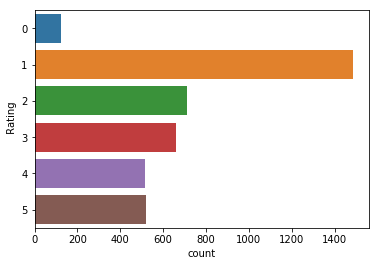

In [10]:
sns.countplot(data=df, orient='h', y=' Rating')
# Majority of items are rated low / below average       => mean based on above table 2.38
# It makes sense to focus on high ratings which determine the style/mood of the item

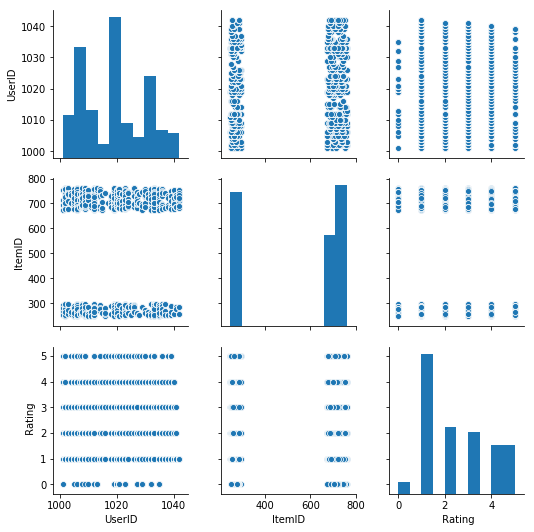

In [8]:
sns.pairplot(df) 
#ItemIDs are distributed in two groups ~300 and ~700  => 139 unique items
# majority of ratings =1
# UserIDs between 1000 and 1042                       => 42 unique users

In [9]:
df[(df['ItemID'] == 715) & (df[' Rating'] > 3)]
#One item may be ranked more than once based on categorical tag; 
# Based on below item 715:     
#               => considered good by user 1002 on a rainy day in urban area & as general
#               => considered good by user 1032 for a lazy/sad mood & as general
#               => considered good by user 1033 at night & as general

,UserID,ItemID,Rating,DrivingStyle,landscape,mood,naturalphenomena,RoadType,sleepiness,trafficConditions,weather
49,1002,715,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rainy
103,1002,715,4,NaN,urban,NaN,NaN,NaN,NaN,NaN,NaN
134,1002,715,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3112,1032,715,4,NaN,NaN,sad,NaN,NaN,NaN,NaN,NaN
3114,1032,715,4,NaN,NaN,lazy,NaN,NaN,NaN,NaN,NaN
3143,1032,715,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3323,1033,715,5,NaN,NaN,NaN,night,NaN,NaN,NaN,NaN
3564,1033,715,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.columns

Index(['UserID', 'ItemID', ' Rating', 'DrivingStyle', 'landscape', 'mood',
       'naturalphenomena ', 'RoadType', 'sleepiness', 'trafficConditions',
       'weather'],
      dtype='object')

In [12]:
df = df[['ItemID', ' Rating', 'DrivingStyle', 'landscape', 'mood',
       'naturalphenomena ', 'RoadType', 'sleepiness', 'trafficConditions',
       'weather']]
idx = ['ItemID',' Rating']
multi_indexed_df = df.set_index(idx)
stacked_df = multi_indexed_df.stack(dropna=False)
long_df = stacked_df.reset_index()
cleaned_df = long_df.dropna()

In [13]:
cleaned_df.head()

,ItemID,Rating,level_2,0
7,715,2,weather,sunny
15,267,4,weather,sunny
23,294,2,weather,sunny
31,259,4,weather,snowing
39,674,2,weather,rainy


In [17]:
data = cleaned_df.pivot(columns=0,values=' Rating')
data['ItemID'] = cleaned_df['ItemID']
data.index = data['ItemID']
data.head(10)
# still having multiple ratings per item x category

,active,afternoon,awake,city,cloudy,coast line,country side,day time,free road,happy,...,relaxed driving,sad,serpentine,sleepy,snowing,sport driving,sunny,traffic jam,urban,ItemID
ItemID,,,,,,,,,,,,,,,,,,,,,
715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,715
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,267
294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,294
259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,259
674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,674
674,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,674
259,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259
715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,715
285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285


In [18]:
# average ratings per item on all categories
for itemID in data['ItemID'].unique():
    for column in data.columns:
        data.loc[itemID,column] = data[data['ItemID']==itemID][column].mean()

In [19]:
data.drop_duplicates(inplace=True)

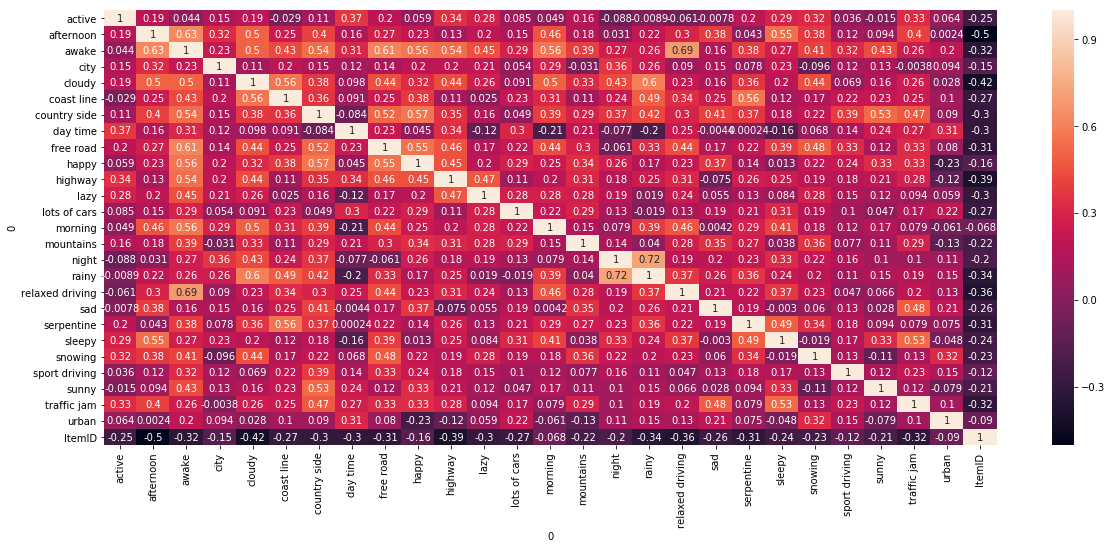

In [20]:
# correlation between categories based on average ratings per item
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),annot=True)
# highest correlations =>      >=0.6
#     awake: afternoon/free road/relaxed driving
#     rainy: cloudy/night
# relatively high correlations =>         >0.5 
#     awake: countryside/happy/highway/morning
#     coastline: cloudy/serpentine
#     countryside: awake/free road/happy/sunny
#     free road: happy/coast line
#     sleepy: traffic jam/afternoon